## Фаза 1. Неделя 1. Вторник
### Проверка статистических гипотез

In [119]:
import pandas
import numpy as np
import seaborn as sns
import scipy.stats as st

from matplotlib import pyplot as plt

## Блок 1. Устройство статистических тестов для проверки гипотез (пайплайн проверки гипотез)

1. Исходная выборка/выборки из ГС
2. Сформулировать основную и альтернативную гипотезы
3. Зафиксировать уровень значимости($\alpha$) и выбрать статистику
4. Вычисляем значение статистики, которое получили по выборке
5. Так как выборка это случайность, то __статистика(метрика) вычисленная по ней - тоже случайная величина, ведь зависит от выборки, полученной случайно, а значит имеет распределение__. Нам важно его знать
6. Зная распределение статистики, мы можем по полученному нами значению(пункт 4) понять, аномальное значение мы получили в конектсте нашего распределения или же нет.
7. Принять решение о справедливости гипотезы на уровне значимости $\alpha$



* [Небольшое видео об этом](https://vk.com/video/playlist/-92204627_81?section=playlist_81&z=video-92204627_456239812%2Fclub92204627%2Fpl_-92204627_81)

#### **Примечание:** 📚 В лекции у нас был пример с проверкой гипотезы о доле, а ниже задачи с гипотезой о среднем. Однако, все на самом деле работает точно так же по пайплайну, описанному выше. 🔄



##### 1.1 Проверка гипотезы о среднем

* у вас есть веб-сервис для онлайн-курсов, и вы решили внедрить новую ML-модель рекомендаций курсов для увеличения уровня участия студентов. Вы хотите оценить, насколько новая система рекомендаций влияет на время, которое студенты проводят на платформе.

* случайным образом выбрано 100 студентов и записано количество часов, которое они провели на платформе через месяц после.

* ранее среднее время составляло 29.07 часа. Проверьте, есть ли статистически значимое улучшение на уровне значимости $\alpha = 0.05$ от ML-модели.

$H_0: \mu = 29.07$

$H_1: \mu > 29.07$

In [120]:
arr = np.array(
    [
        28.91,
        26.45,
        30.97,
        32.58,
        30.23,
        27.26,
        31.33,
        30.4,
        28.29,
        27.26,
        26.08,
        33.19,
        29.18,
        27.32,
        31.36,
        30.74,
        28.86,
        27.87,
        26.37,
        33.56,
        29.09,
        27.81,
        31.07,
        30.73,
        28.94,
        27.02,
        26.76,
        33.97,
        29.73,
        27.86,
        31.28,
        30.01,
        28.55,
        27.1,
        26.46,
        33.22,
        29.55,
        27.41,
        31.09,
        30.88,
        28.01,
        27.48,
        26.61,
        33.19,
        29.67,
        27.22,
        31.02,
        30.16,
        28.92,
        27.79,
        26.58,
        33.81,
        29.42,
        27.89,
        31.13,
        30.15,
        28.51,
        27.21,
        26.53,
        33.1,
        29.14,
        27.27,
        31.71,
        30.84,
        28.05,
        27.16,
        26.04,
        33.7,
        29.92,
        27.89,
        31.87,
        30.99,
        28.84,
        27.5,
        26.87,
        33.6,
        30.0,
        27.32,
        31.85,
        30.67,
        28.94,
        27.69,
        26.65,
        33.29,
        29.34,
        27.71,
        31.62,
        30.48,
        28.18,
        27.77,
        26.61,
        33.19,
        29.7,
        27.47,
        31.05,
        30.14,
        28.4,
        27.52,
        26.19,
        34.04,
    ]
)

* Ну что ж, нам нужна __статистика__, которая агрегирует всю информацию о выборке.

* если выбрать статистику $T(X) = \dfrac{1}{n} \sum_{i=1}^{n}x_i = \overline{X}$, то мы имеем дело со знакомым уже нам выборчным средним. Можно как минимум воспользоваться [Центральной Предельной Теоремой](https://nesrakonk.ru/central_limit_theorem-2/), при ней мы знаем, что $\overline{X} \sim N(\mu, \dfrac{\sigma^2}{n})$

В Нашем случае мы предполагам что $\mu = 29.07$, но мы не знаем дисперсию $\sigma^2$ у ГС. Поэтому приблизим выборчной дисперсией $s^2 = \dfrac{1}{n-1} \sum_{i=1}^n (x_i - \overline{X}) ^ 2$.

* 1.1.1 Посчитайте значение статистики, полученной по нашей выборке

In [121]:
t_stat = arr.mean()
t_stat

np.float64(29.383499999999998)

* 1.1.2 С помощью [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) создайте экземпляр класса распределения вашей статистики, с ее параметрами. 

In [122]:
mu = 29.07
sigma = np.std(arr, ddof=1) / np.sqrt(len(arr))
distr = st.norm(mu, sigma)
sigma

np.float64(0.22278573186636597)

* 1.1.3 Посчитайте критическое значение для вашей статистики

In [123]:
alpha = 0.05
t_crit = distr.ppf(1 - alpha)
t_crit

np.float64(29.43644991909343)

* 1.1.4 Нарисуйте график распределения вашей статистики, отобразите на нем следующее:
    1. Пунктирной линией t_stat
    2. Пунктирной линией t_crit

''

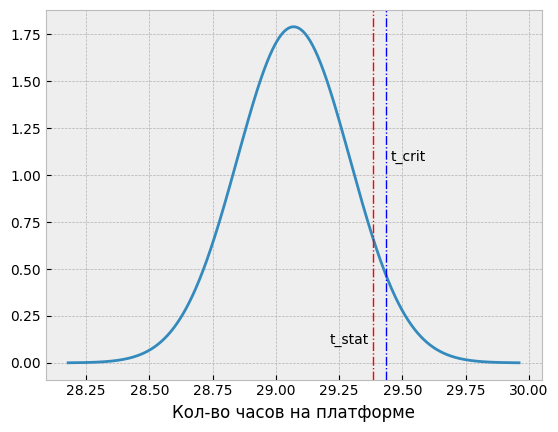

In [124]:
plt.style.use('bmh')
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
y = distr.pdf(x)
plt.plot(x, y)
plt.xlabel('Кол-во часов на платформе')
plt.axvline(t_crit, color='blue', linestyle='-.', linewidth=1)
plt.axvline(t_stat, color='red', linestyle='-.', linewidth=1)
plt.annotate(
        't_stat',
        (t_stat, 0.025),
        textcoords="offset points",
        xytext=(-3, 10),
        ha='right',
        fontsize=10,
)
plt.annotate(
        't_crit',
        (t_crit, 1),
        textcoords="offset points",
        xytext=(3, 10),
        ha='left',
        fontsize=10,
)

;

* 1.1.5 Посчитайте p-value

In [125]:
p_value = 1 - distr.cdf(t_stat)
print(f"p-value = {p_value}")
if p_value > alpha:
    print("гипотезу H0 принимаем")
else:
    print("гипотнзу H1 принимаем")

p-value = 0.07968676158455756
гипотезу H0 принимаем


* 1.1.6 На основании значения статистики и p-value, примите решение о справедливости гипотезы

> Верна гипотеза $H_0$, т.е. статистически значимого увеличения времени не произошло

##### 1.2 В ресторане появилось новое экспериментальное блюдо, которое в планах должно заменить одно из старых блюд. Необходимо количественно оценить, лучше ли оно старого блюда, или нет. Для этого был проведен эксперимент, в рамках которого людям давали попробовать и просили оценить блюда по шкале от 1 до 10. Получились две выборки:

In [126]:
old = np.array(
    [
        6,
        8,
        4,
        7,
        8,
        7,
        5,
        9,
        7,
        6,
        9,
        8,
        6,
        9,
        5,
        7,
        10,
        8,
        6,
        7,
        8,
        10,
        8,
        7,
        9,
        6,
        7,
        8,
        5,
        9,
        9,
        8,
        8,
        6,
        6,
        7,
        9,
        7,
        7,
        7,
        7,
        8,
        8,
        7,
        8,
        6,
        8,
        8,
        8,
        8,
    ]
)
new = np.array(
    [
        9,
        8,
        5,
        9,
        10,
        9,
        6,
        8,
        8,
        8,
        9,
        7,
        7,
        8,
        6,
        9,
        7,
        9,
        8,
        8,
        7,
        7,
        8,
        5,
        9,
        8,
        7,
        7,
        7,
        9,
        8,
        8,
        7,
        7,
        9,
        8,
        9,
        6,
        5,
        9,
        8,
        9,
        6,
        9,
        9,
        8,
        10,
        8,
        10,
        10,
    ]
)

* Можно взглянуть на распределение оценок блюд

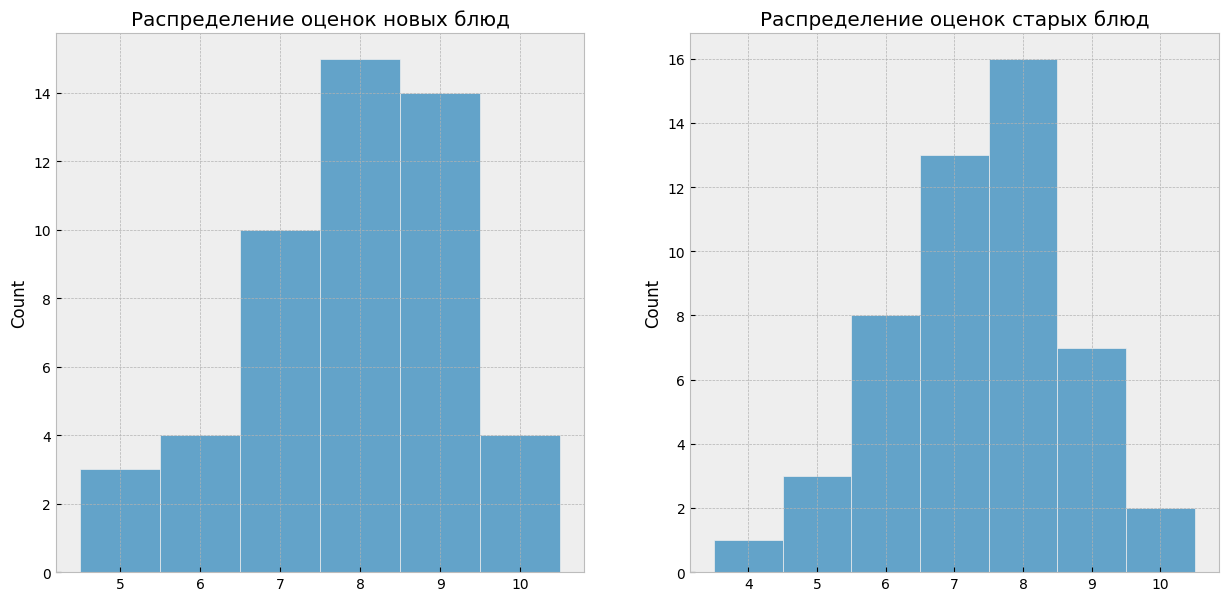

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(new, ax=axes[0], bins=np.arange(4.5, 11.5, 1))
sns.histplot(old, ax=axes[1], bins=np.arange(3.5, 11.5, 1))

axes[0].set_title("Распределение оценок новых блюд")
axes[1].set_title("Распределение оценок старых блюд")

plt.show()

$H_0 : \mu_{new} = \mu_{old}$

$H_1 : \mu_{new} \neq \mu_{old}$  или $H_1 : \mu_{new} > \mu_{old}$ или $H_1 : \mu_{new} < \mu_{old}$

$\mu$ - это среднее по группе.  

* Иначе говоря, мы пытаемся ответить на вопрос, является ли новое блюдо лучше в среднем по Генеральной Совокупности посетителей нашего ресторана

Такие задачи называются __проверкой гипотезы__ о среднем и встречаются чаще всего

Реализуйте следующую статистику, которая имеет название t-статистика: 
    
    
$T(X) = \dfrac{\overline{X}_{new} - \overline{X}_{old}}{\sqrt{{\dfrac{s^2_{new}}{n_{new}}} + \dfrac{s^2_{old}}{n_{old}}}}$  

где $\overline{X}$ - выборочные средние, $s^2$ - выборочные дисперсии, n - количество элементов в выборке.  


Такая статистика имеет [t-распределение](https://en.wikipedia.org/wiki/Student%27s_t-distribution) или иногда называют распределением Стьюдента. По форме оно очень похоже на нормальное и если быть предельно точным, то на больших выборках t-распределение стремится к нормальному. 

$T(X) \sim t(n_{new} + n_{old} - 2)$

Обернуть все в функцию, позволяющую вычислять двухвыборочный t-тест. 
Функция должна принимать следующие аргументы: 
* `sample_1`, `sample_2` - два списка выборочными данными
* `alternative` принимает одно из трех значений: `twosided`, `left`, `right`. Аргумент позволяет контролировать вид проверяемой альтернативы.
* `alpha` - уровень значимости

Функция должна распечатывать результат проверки аналогично примеру выше, а также возвращать значение статистики и `p_value`. 

In [147]:
def ttest(sample_1, sample_2, alternative="twosided", alpha=0.05, independent=True):
    sample1 = np.array(sample_1)
    sample2 = np.array(sample_2)
    mean1 = sample1.mean()
    mean2 = sample2.mean()
    sigma1 = np.std(sample1, ddof=1)
    sigma2 = np.std(sample2, ddof=1)
    n1 = len(sample_1)
    n2 = len(sample_2)
    t_stat = (mean1 - mean2) / np.sqrt(sigma1**2 / n1 + sigma2**2 / n2)
    t_dist = st.t(len(sample_1) + len(sample_2) - 2)
    if alternative == "twosided":
        p_value = 2 * (1 - t_dist.cdf(abs(t_stat)))
    elif alternative == "left":
        p_value = t_dist.cdf(t_stat)
    elif alternative == "right":
        p_value = 1 - t_dist.cdf(t_stat)
    else:
        p_value = None
        print('Wrong parameter "alternative"')
    print(f"t_stat = {t_stat}")
    print(f"p_value = {p_value}")
    if p_value > alpha:
        print("гипотезу H0 принимаем")
    else:
        print("гипотнзу H1 принимаем")
    return t_stat, p_value


ttest(old, new, alternative="right")

t_stat = -1.9960268449458625
p_value = 0.9756470380416103
гипотезу H0 принимаем


(np.float64(-1.9960268449458625), np.float64(0.9756470380416103))

##### 1.3 Возьмите готовый `ttest_ind` для задачи выше и сравните результаты c вашим самописным

* небольшая разница  в результатах допустима

In [146]:
st.ttest_ind(old, new, alternative="greater")

TtestResult(statistic=np.float64(-1.9960268449458625), pvalue=np.float64(0.9756470380416103), df=np.float64(98.0))

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add 04-03-task.ipynb`
3. Выполни команду `git commit -m "hypothesis tasks in progress"`
4. Выполни команду `git push`

## Блок 2. Применение готовых статистических тестов для проверки гипотез

*  📊 Вы не первые, кто проверяет гипотезы! 📊
*  Поэтому существуют готовые реализации статистических тестов. 
*  Давайте рассмотрим самые основные из них. 👇

### 2.1. Гипотеза о доле


Напишите функцию(или возьмите сразу готовую), которая принимает на вход количество элементов выборки а так же долю "успехов" и отвеьте на вопрос:

*  можно ли считать монетку честной, если после 100 подбрасываний, выпало 57 орлов (доля выпадения 0.57)
*  Стала ли статистически значимо эффективнее реклама, если ранее конверсия была 0.2, а сейчас на выборке из 200 элементов конверсия вышла 0.3

`Подсказка`: Можно использовать _z_test_ или _binom_test_

In [156]:
alpha = 0.05  # примем уровень значимости равным 0.05

# Задача про монетку

p_val_coin = st.binomtest(57, 100, 0.5).pvalue
print(
    f"p_value выпадения 57 орлов из 100 подбрасываний монетки равно {np.round(p_val_coin, 3)}"
)
if p_val_coin >= alpha:
    print("Монетка честная")
else:
    print("Монетка нечестная")

print("")

# Задача про рекламу

p_val_ad = st.binomtest(60, 200, 0.2).pvalue
print(f"p_value коверсии 0.3 на выборке из 200 элементов равно {np.round(p_val_ad, 3)}")
if p_val_ad >= alpha:
    print("Рекламу нельзя считать эффективной")
else:
    print("Реклама эффективная")

p_value выпадения 57 орлов из 100 подбрасываний монетки равно 0.193
Монетка честная

p_value коверсии 0.3 на выборке из 200 элементов равно 0.001
Реклама эффективная


### 2.2 Доверительный интервал

Реализовать функцию, позволяющую строить доверительный интервал для среднего. На вход функции поступает выборка (n > 20), уровень значимости. 

Воспользуйтесь методом `scipy.stats.t.interval` или же напишите его вручную по формуле из лекции

In [ ]:
def rel_interval(sample, alpha=0.05):
    sample = np.array(sample)
    return st.t.interval(
        alpha,
        len(sample) - 1,
        loc=sample.mean(),
        scale=np.std(sample, ddof=1) / np.sqrt(len(sample)),
    )

* Постройте 95%-доверительный интервал для среднего кубика, у которого вот такой результат

    - [6, 1, 2, 4, 6, 5, 5, 6, 3, 3, 6, 3, 4, 2, 2, 2, 4, 4, 3, 6]
    - честный ли он? (у честного кубика мат.ожидание = 3.5)

In [166]:
arr = [6, 1, 2, 4, 6, 5, 5, 6, 3, 3, 6, 3, 4, 2, 2, 2, 4, 4, 3, 6]
true_mean = 3.5
res = rel_interval(arr, 0.05)
print("Доверительный интервал среднего значения кубика при alpha = 0.05:")
print(f"[{np.round(res[0], 2)} : {np.round(res[1], 2)}]")
if res[0] <= true_mean <= res[1]:
    print("Кубик честный")
else:
    print("кубик нечестный")

Доверительный интервал среднего значения кубика при alpha = 0.05:
[3.83 : 3.87]
кубик нечестный


### 2.3 Bootstrap

* Есть сервис по доставке еды, который заявляет, что среднее время их доставки составляет 20 минут

* Мы подняли все наши заказы у данного сервиса

In [132]:
sample = np.array(
    [
        10,
        13,
        18,
        8,
        14,
        15,
        14,
        15,
        10,
        14,
        21,
        20,
        18,
        13,
        10,
        13,
        11,
        10,
        21,
        16,
        18,
        21,
        22,
        20,
        25,
        14,
        12,
        14,
        11,
        16,
        30,
        29,
        30,
        31,
        28,
        28,
        24,
        48,
        35,
        50,
        33,
        18,
        31,
        22,
        33,
        27,
        28,
        44,
        22,
        23,
        28,
        23,
        22,
        30,
        27,
        30,
        30,
        41,
        26,
        29,
        35,
        28,
        27,
        22,
        25,
        33,
        28,
        7,
        19,
        15,
        20,
        36,
        22,
        17,
        17,
        29,
        14,
        31,
        11,
        16,
        24,
        13,
        15,
        21,
        30,
        26,
        19,
        21,
        13,
        16,
        29,
        37,
        26,
        15,
        21,
        24,
        12,
        27,
        18,
        32,
        33,
        47,
        23,
        33,
        17,
        19,
        25,
        15,
        14,
        20,
        23,
        13,
        44,
        33,
        48,
        34,
        34,
        28,
        27,
        21,
        26,
        44,
        41,
    ]
)


* Постройте 95%-доверительный интервал для среднего времени доставки

In [169]:
def bootstrap_interval(sample, n=100000, metrics="mean", alpha=0.05):
    boot_res = []
    for _ in range(n):
        temp_sample = np.random.choice(sample, size=len(sample))
        if metrics == "mean":
            boot_res.append(temp_sample.mean())
        elif metrics == "median":
            boot_res.append(np.median(temp_sample))
        elif metrics == "dispertion":
            boot_res.append(np.var(temp_sample))
        else:
            print("Wrong parameter 'metrics'")
            return None
    return np.percentile(boot_res, [alpha / 2, 100 - (alpha / 2)])


print(
    f'95%-доверительный интервал для среднего времени доставки: [{np.round(bootstrap_interval(sample, metrics="mean")[0], 1)} : {np.round(bootstrap_interval(sample, metrics="mean")[1], 1)}]'
)
print(
    f'95%-доверительный интервал для медианы времени доставки: [{np.round(bootstrap_interval(sample, metrics="median")[0], 1)} : {np.round(bootstrap_interval(sample, metrics="median")[1], 1)}]'
)
print(
    f'95%-доверительный интервал для дисперсии времени доставки: [{np.round(bootstrap_interval(sample, metrics="dispertion")[0], 1)} : {np.round(bootstrap_interval(sample, metrics="dispertion")[1], 1)}]'
)

95%-доверительный интервал для среднего времени доставки: [20.8 : 26.7]
95%-доверительный интервал для медианы времени доставки: [19.0 : 27.0]
95%-доверительный интервал для дисперсии времени доставки: [53.4 : 130.9]


Также можно посчитать дополнительно:

* Постройте 95%-доверительный интервал для медианы времени доставки
* Постройте 95%-доверительный интервал для дисперсии времени доставки

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add 04-02-task.ipynb`
3. Выполни команду `git commit -m "hypothesis tasks done"`
4. Выполни команду `git push`

## Блок 3. Дополнительные задания. "Набить руку" (не является обязательным)

### 3.1 Оценка эффективности рекламы
 

* Вы провели эксперимент, в рамках которого 1000 человек увидели рекламу нового продукта, а 1000 человек не увидели. 
* После проведения эксперимента вы получили следующие результаты: 
    - 100 человек из тех, кто увидел рекламу, купили продукт
    - 50 человек из тех, кто не увидел рекламу, купили продукт
 * Проверьте гипотезу о том, что реклама не влияет на покупку продукта на уровне значимости $\alpha = 0.05$. В ответ запишите достигаемый уровень значимости с точностью до четвертого знака.

In [134]:
# your code

### 3.2 Студенты 

* Допустим, вы думаете, что $25\%$ студентов вашего университета ни разу не пропустили ни одной лекции. В выборочном опросе из $75$ случайных студентов таких оказалось $15$ человек. Проверьте свою гипотезу на уровне значимости $\alpha = 0.02$ против двусторонних альтернатив. В ответ запишите достигаемый уровень значимости с точностью до четвертого знака.

In [135]:
# your code

### 3.3 Медицинский кейс

* Пусть для группы из $n = 25$ пациентов вычислено среднее артериальное давление $\bar{x} = 100$ мм рт. ст. Из предыдущих исследований известно стандартное отклонение $\sigma = 12$ мм рт. ст. Постройте $98\%$ доверительный интервал для среднего артериального давления.

In [136]:
# your code

### 3.4 Свой StatTester

Реализуй класс, позволяющий проводить проверку гипотезу о средних для двух выборок. 
1. В конструктор класса передаются две выборки
2. Пользователь выбирает тип задачи (Гипотеза о доле или среднем). Исходя из выборка выбираем либо `z-статистику`, либо `t-статистику`
3. В методе `test` проводится тестирование, метод возвращает значение статистики, p_value и результат проверки
4. Выбирается альтернатива: двухсторонняя, правая или левая
5. Уровень значимости по умолчанию равен $0.05$ (может быть переназначен пользователем)
6. Добавь метод, позволяющий вычислять доверительные интервалы для средних для обеих выборок

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add 04-03-task.ipynb`
3. Выполни команду `git commit -m "total tasks done"`
4. Выполни команду `git push`